## 第105讲 Imbalanced Data对于SVM影响以及C的作用

## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

In [ ]:
SVM & Imbalanced data

Dataset 1 — 100 blue points and 2 red points
Dataset 2 — 100 blue points and 20 red points
Dataset 3 — 100 blue points and 50 red points
Dataset 4 — 100 blue points and 100 red points

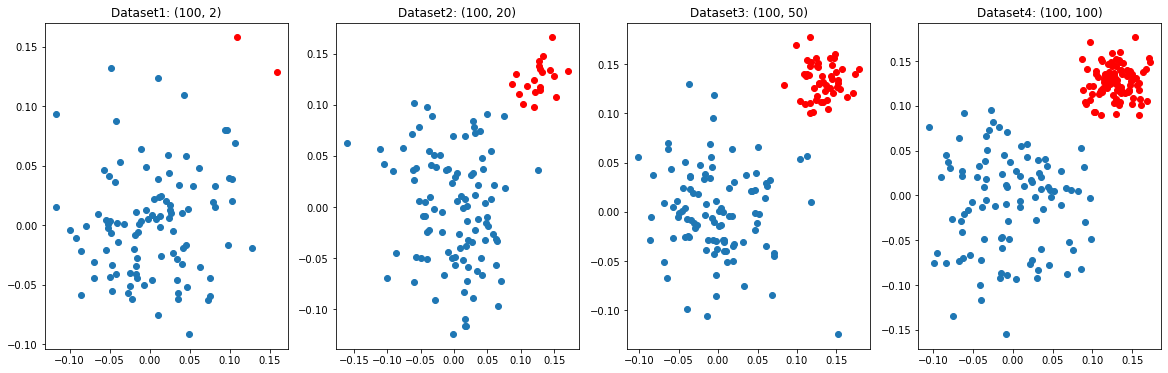

In [40]:
import numpy as np
import matplotlib.pyplot as plt
ratios = [(100,2), (100, 20), (100, 50), (100, 100)]
plt.figure(figsize = (20,6))
for j,i in enumerate(ratios):
 plt.subplot(1, 4, j+1) 
 X_p=np.random.normal(0,0.05,size=(i[0],2))
 X_n=np.random.normal(0.13,0.02,size=(i[1],2))
 y_p=np.array([1]*i[0]).reshape(-1,1)
 y_n=np.array([0]*i[1]).reshape(-1,1)
 X=np.vstack((X_p,X_n))
 y=np.vstack((y_p,y_n))
 plt.title('Dataset' + str(j+1)+ ': ' +str(i))
 plt.scatter(X_p[:,0],X_p[:,1])
 plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

In [41]:
#draw the line that separates the point
def draw_line(coef,intercept, mi, ma):
 
  points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],
  [((-coef[1]*ma - intercept)/coef[0]), ma]])
 
  plt.plot(points[:,0], points[:,1])

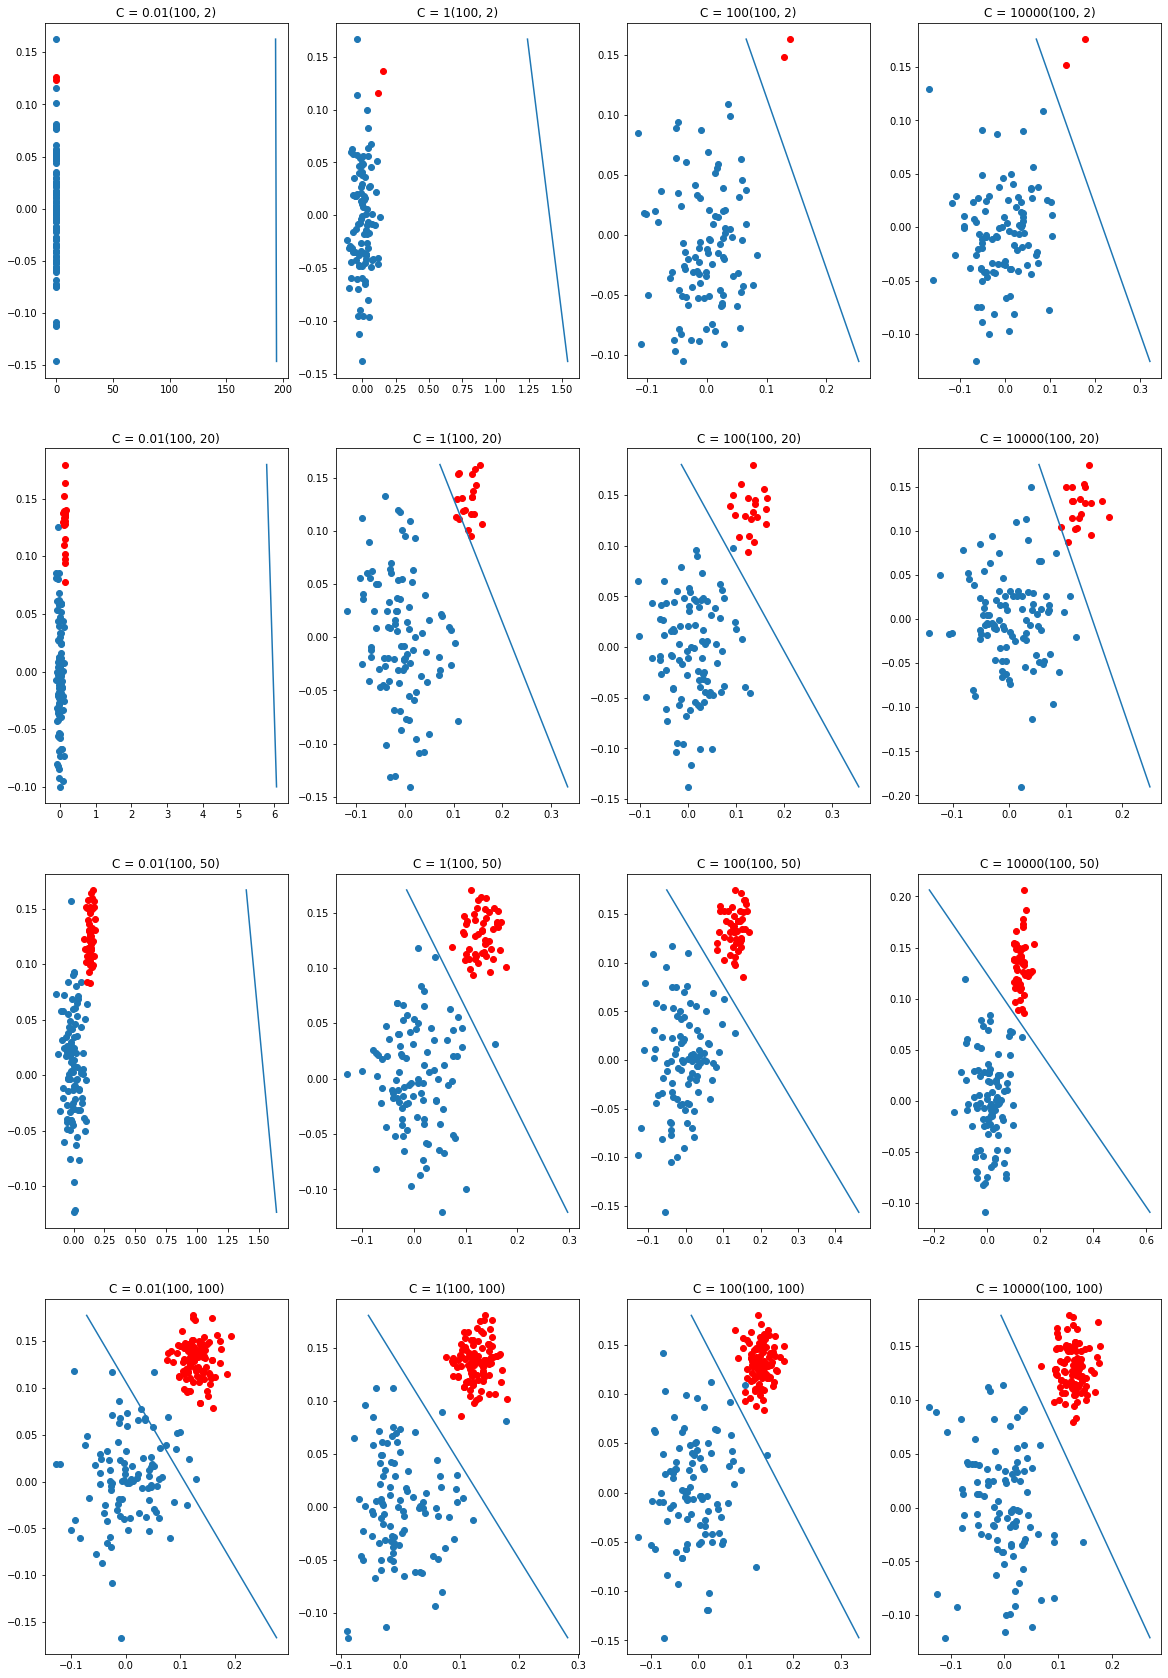

In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
c = [0.01,1,100,10000]
plt.figure(figsize = (20,30))
ratios = [(100,2), (100, 20), (100, 50), (100, 100)]
num=1
for j,i in enumerate(ratios):
 for k in range(0, 4):
   model=LinearSVC(C=c[k])
   #model=LogisticRegression(C=c[k])
   #model=SVC(kernel='linear',C=c[k])
   plt.subplot(4, 4, num) 
   num=num+1
   X_p=np.random.normal(0,0.05,size=(i[0],2))
   X_n=np.random.normal(0.13,0.02,size=(i[1],2))
   y_p=np.array([1]*i[0]).reshape(-1,1)
   y_n=np.array([0]*i[1]).reshape(-1,1)
   X=np.vstack((X_p,X_n))
   y=np.vstack((y_p,y_n))
   model.fit(X,y)
   plt.scatter(X_p[:,0],X_p[:,1])
   plt.scatter(X_n[:,0],X_n[:,1],color='red')
   plt.title('C = '+ str(c[k])+str(i))
   draw_line(coef=model.coef_[0],intercept=model.intercept_,ma=       max(X[:,1]), mi= min(X[:,1]))
 
plt.show()

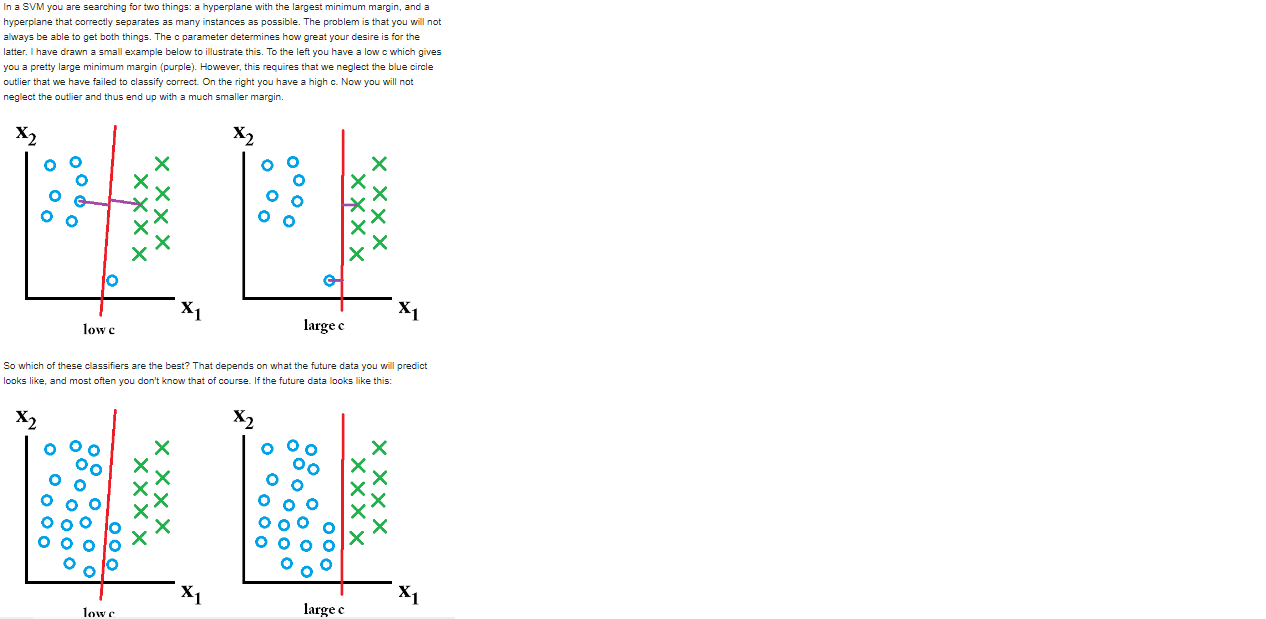

In [35]:
from IPython.display import Image
Image(filename='D:\python\Interview-Prepartion-Data-Science-master\Lesson105-1.png')

SVM can handle balanced and imbalanced dateset with the help of 'c' parameter. c is a parameter which can be though of how much strict we want our model to be or in other words how many data-points we allow the model to make mistake in. Therefore as in a imbalanced dateset, no of points from one of the classes is already low , so we cannot afford to allow the model to make higher number of  mistakes. So we have to make the model more strict , i.e choose a higher c value.

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.